# Parte 1: Carga y Exploración Inicial de Datos
1. Carga del Dataset:
- Cargar el dataset desde Kaggle.
2. Exploración Inicial:
- Revisar la estructura del dataset.
- Describir las variables y su distribución.
- Identificar y documentar valores faltantes y outliers.

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

df = pd.read_csv('../Data/heart.csv')
df.head().T

,0,1,2,3,4
age,63.0,37.0,41.0,56.0,57.0
sex,1.0,1.0,0.0,1.0,0.0
cp,3.0,2.0,1.0,1.0,0.0
trestbps,145.0,130.0,130.0,120.0,120.0
chol,233.0,250.0,204.0,236.0,354.0
fbs,1.0,0.0,0.0,0.0,0.0
restecg,0.0,1.0,0.0,1.0,1.0
thalach,150.0,187.0,172.0,178.0,163.0
exang,0.0,0.0,0.0,0.0,1.0
oldpeak,2.3,3.5,1.4,0.8,0.6


In [4]:
# Identificar valores nulos
print("Valores nulos:\n", df.isnull().sum())
# Identificación y eliminación de duplicados
print("Valores duplicados:", df.duplicated().sum())

Valores nulos:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
Valores duplicados: 1


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


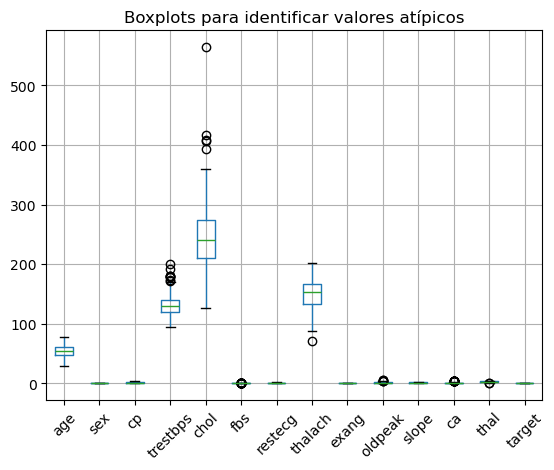

In [9]:
#Los datos están bien hechos.
# Crea los boxplots para identifica valores atipicos
df.boxplot(rot=45)
plt.title("Boxplots para identificar valores atípicos")
plt.show()

# Parte 2: Análisis Exploratorio de Datos
1. Análisis Estadístico Descriptivo:
- Calcular estadísticas descriptivas básicas (media, mediana, desviación estándar, etc.).
- Analizar la distribución de las variables categóricas.
2. Visualizaciones:
- Crear histogramas y gráficos de barras para entender la distribución de las variables.
- Crear un mapa de calor para visualizar las correlaciones entre las variables.
- Utilizar gráficos de dispersión para identificar posibles relaciones entre las variables.
3. Valores Faltantes y Outliers:
- Detectar y tratar valores faltantes.
- Identificar y manejar outliers.

In [10]:
print(df.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.9051

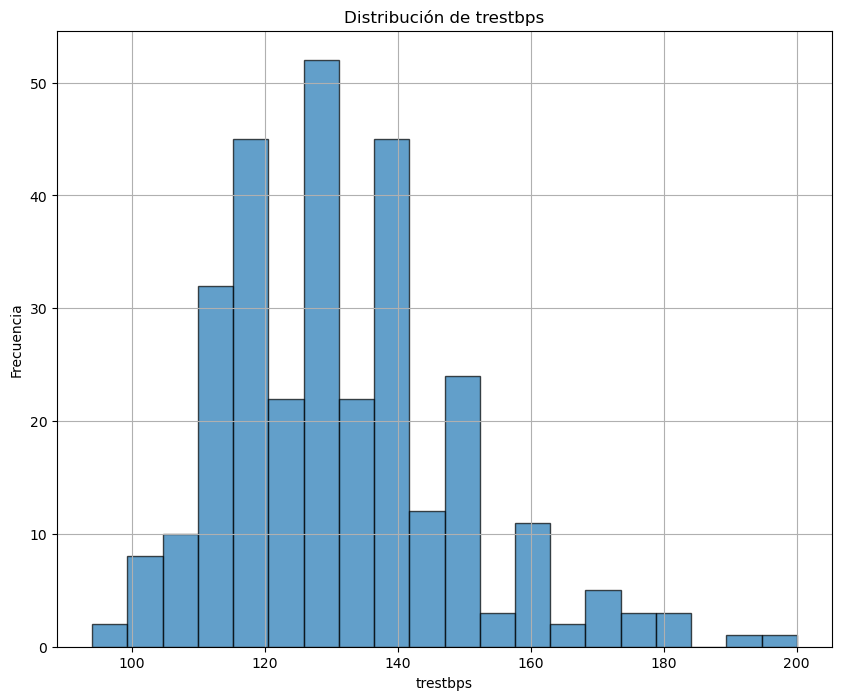

In [ ]:
plt.figure(figsize=(10, 8))
plt.hist(df['trestbps'], bins = 20, edgecolor = 'black', alpha = 0.7)
plt.title('Distribución de trestbps')
plt.xlabel('trestbps')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

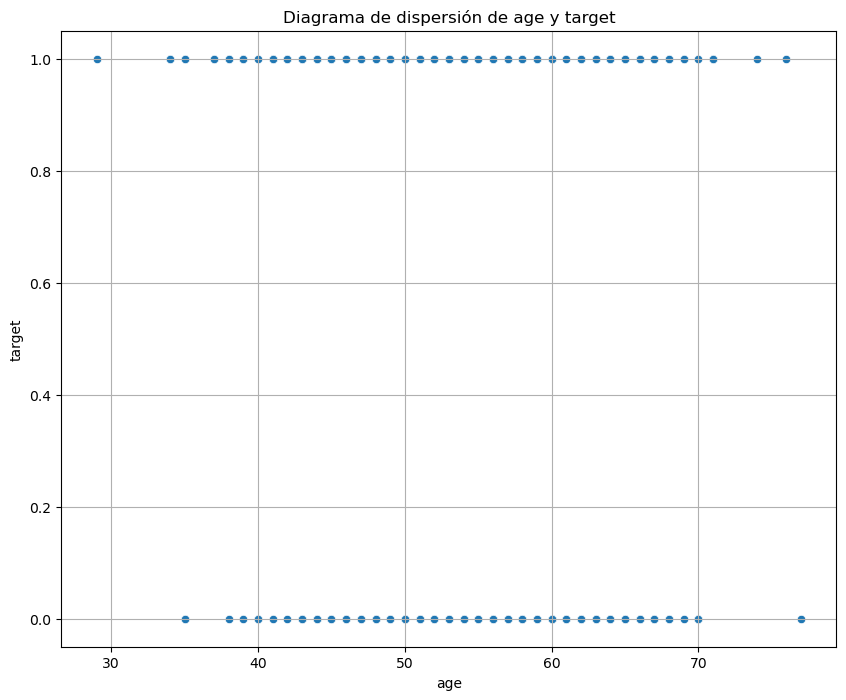

In [14]:

plt.figure(figsize=(10, 8))
sns.scatterplot(x = 'age', y = 'target', data = df)
plt.title('Diagrama de dispersión de age y target')
plt.xlabel('age')
plt.ylabel('target')
plt.grid(True)
plt.show()

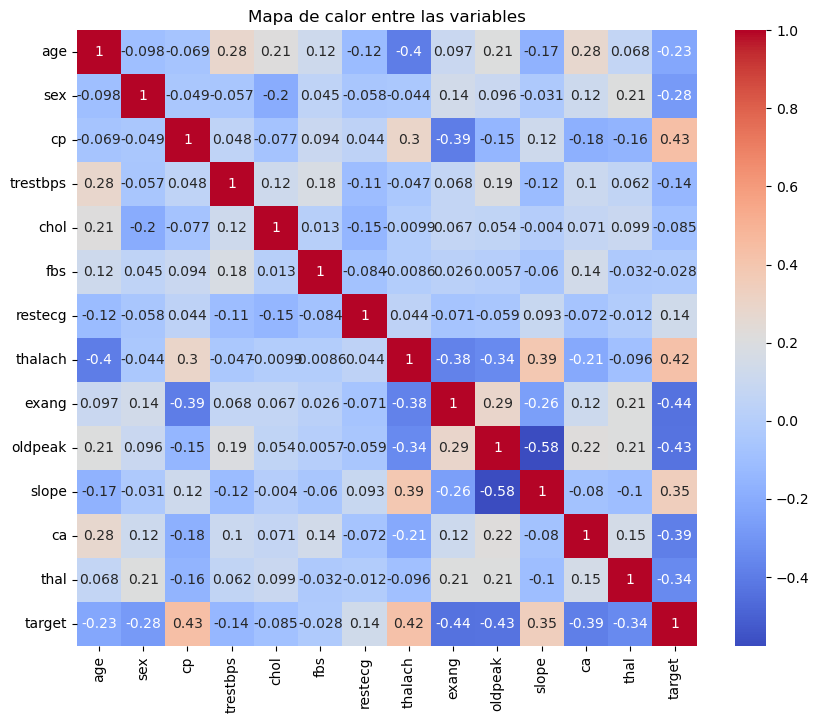

In [15]:
#No hay una relación muy fuerte entre ambas variables
#Quiere decir que no siempre a mayor edad se tiene problemas cardiacos
plt.figure(figsize=(10, 8))
df_numeric = df.select_dtypes(include=['number'])
correlation_matrix = df_numeric.corr()
sns.heatmap(correlation_matrix, annot= True, cmap='coolwarm')
plt.title('Mapa de calor entre las variables')
plt.show()

In [ ]:
#Los valores que veo importantes son slope y oldpeak
#Me indican -0.58 que a mayor slope, menor oldpeak
#cp com target con 0.43 que me indica que si tenemos dolor en el pecho muy probablemente que tenga problemas cardiacos

# Parte 3 : Preprocesamiento de Datos
1. Transformación de Columnas:
- Codificar variables categóricas utilizando One-Hot Encoding.
- Escalar características numéricas utilizando StandardScaler.
2. División del Conjunto de Datos:
- Dividir el dataset en conjuntos de entrenamiento y prueba.

In [ ]:
#Selecciono la variable objetivo y la separo
X = df.drop('target', axis = 1) #Con esto selecciono todas las columnas, excepto charges
y = df['target'] #Esta sería mi columna objetivo

#Ahora divido los conjuntos de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Ahora hago el pipeline

num_columns = X.select_dtypes(include=['float64', 'int64']).columns
cat_columns = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps =[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore') )
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_columns),
        ('cat', categorical_transformer, cat_columns)
    ]
)

#Ahora hago el pipeline completo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

#Parte 4: Implementación de XGBoost
1. Entrenamiento del Modelo:
- Entrenar un modelo de XGBoost con hiperparámetros básicos.
- Evaluar el modelo utilizando métricas de rendimiento como la exactitud, precisión, recall, F1-Score y ROC-AUC.
2. Optimización de Hiperparámetros:
- Utilizar GridSearchCV para optimizar los hiperparámetros del modelo de XGBoost.
3. Evaluación del Modelo Optimizado:
- Evaluar el rendimiento del modelo optimizado y compararlo con el modelo inicial.

In [20]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(eval_metric='logloss', random_state=42))
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82        29
           1       0.86      0.78      0.82        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [21]:
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(conf_matrix)

Matriz de Confusión:
[[25  4]
 [ 7 25]]


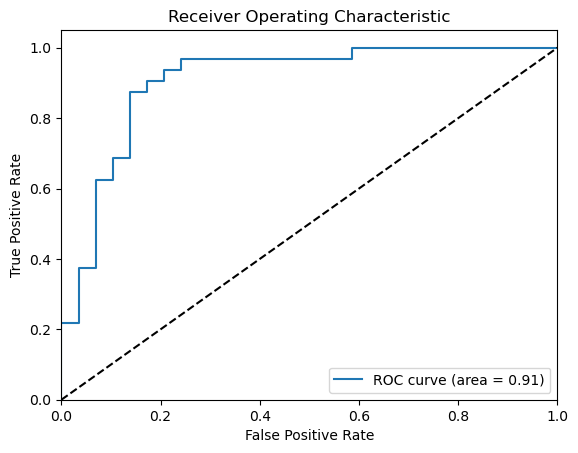

In [22]:
y_prob = pipeline.predict_proba(X_test)[:, 1]

# Curva ROC y AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

# Plotear la curva ROC
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [23]:
#Optimizar con Grid Search
from sklearn.model_selection import GridSearchCV

# Definir el espacio de búsqueda para los hiperparámetros
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__subsample': [0.8, 1.0]
}

# Configurar el GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc', verbose=2, n_jobs=-1
)

# Entrenar el modelo con búsqueda de hiperparámetros
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros y su rendimiento
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Mejores Hiperparámetros:", best_params)
print("Mejor ROC-AUC:", best_score)

best_pipeline = grid_search.best_estimator_

y_pred = best_pipeline.predict(X_test)
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Mejores Hiperparámetros: {'classifier__learning_rate': 0.01, 'classifier__max_depth': 7, 'classifier__n_estimators': 50, 'classifier__subsample': 0.8}
Mejor ROC-AUC: 0.9048420715087382

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [24]:
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(conf_matrix)

Matriz de Confusión:
[[24  5]
 [ 4 28]]


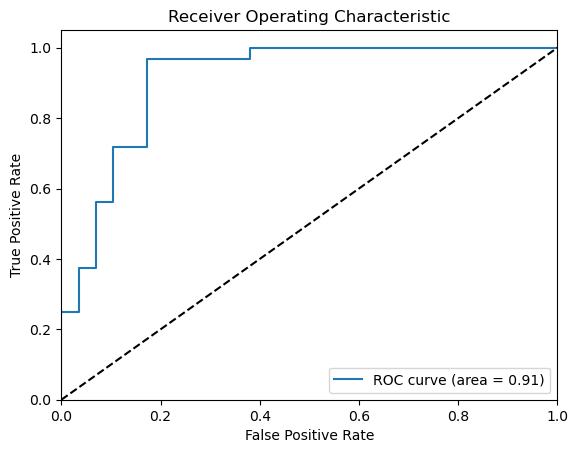

In [25]:
y_prob = best_pipeline.predict_proba(X_test)[:, 1]

# Curva ROC y AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

# Plotear la curva ROC
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#No hay cambios.